In [1]:
!wget 'https://dumps.wikimedia.org/dewiktionary/20230201/dewiktionary-20230201-pages-articles.xml.bz2'
!mkdir wiktionary_data
!mv dewiktionary-20230201-pages-articles.xml.bz2 ./wiktionary_data
!bunzip2 -k ./wiktionary_data/dewiktionary-20230201-pages-articles.xml.bz2
!head -n 80 ./wiktionary_data/dewiktionary-20230201-pages-articles.xml

--2023-02-20 19:34:34--  https://dumps.wikimedia.org/dewiktionary/20230201/dewiktionary-20230201-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.142, 2620:0:861:2:208:80:154:142
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206274696 (197M) [application/octet-stream]
Saving to: ‘dewiktionary-20230201-pages-articles.xml.bz2’

dewiktionary-202302 100%[===================>] 196.72M  4.18MB/s    in 48s     

2023-02-20 19:35:22 (4.11 MB/s) - ‘dewiktionary-20230201-pages-articles.xml.bz2’ saved [206274696/206274696]



In [2]:
# Explore the following library: https://github.com/gambolputty/wiktionary-de-parser
!pip install wiktionary_de_parser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 54.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 31.8 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0


In [3]:
from wiktionary_de_parser import Parser

bzfile_path = './wiktionary_data/dewiktionary-20230201-pages-articles.xml'

# Pass a list with all extraction methods to the class constructor:
i=0
de_records = list()
for record in Parser(bzfile_path):
    # print(record['my_field'])
    if "lang_code" in record:
        if record["lang_code"] == "de":
            de_records.append(record)
    # if i > 100:
    #     break  
    # i+=1

In [18]:
record

{'title': 'Mai',
 'lemma': 'Mai',
 'inflected': False,
 'lang': 'Niederdeutsch',
 'syllables': ['Mai'],
 'pos': {'Substantiv': []},
 'ipa': ['maɪ̯']}

In [5]:
de_records[2]

{'title': 'Subregnum',
 'lemma': 'Subregnum',
 'inflected': False,
 'lang': 'Deutsch',
 'lang_code': 'de',
 'syllables': ['Sub', 'reg', 'num'],
 'pos': {'Substantiv': []},
 'ipa': ['zʊpˈʁeːɡnʊm'],
 'flexion': {'Genus': 'n',
  'Nominativ Singular': 'Subregnum',
  'Nominativ Plural': 'Subregna',
  'Genitiv Singular': 'Subregnums',
  'Genitiv Plural': 'Subregna',
  'Dativ Singular': 'Subregnum',
  'Dativ Plural': 'Subregna',
  'Akkusativ Singular': 'Subregnum',
  'Akkusativ Plural': 'Subregna'}}

In [7]:
len(de_records)

842329

In [6]:
import pandas as pd

def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Now let us use the function above to flatten all dictionaries, so that we
# can store the result as a pandas Dataframe

de_records_flat = [
    flatten_dict(dict_i) for dict_i in de_records
]
de_records_pd = pd.DataFrame(de_records_flat)
de_records_pd.to_csv(
    "./wiktionary_data/de_wiktionary_pd.csv", sep="|", index=False
)

In [9]:
de_records_pd.shape

(842329, 354)

In [10]:
de_records_pd.columns

Index(['title', 'lemma', 'inflected', 'lang', 'lang_code', 'syllables',
       'pos_Substantiv', 'ipa', 'rhymes', 'flexion_Genus',
       ...
       'flexion_mini|1|[Jahhunderthalle Bochum:] „In der Inszenierung, die den riesigen ''Bühnenraum'' der Jahrhunderthalle voll ausnützt, ist - in einer Oper sonst nicht üblich - eine Mikrofonierung der Singstimmen nötig.“<ref>{{Per-Deutsche Welle | Online',
       'flexion_mini|1|[Malzfabrik/Ering:] „Das [[alt]]e [[Gebäude]] hat seit seiner [[Stilllegung]] [[mehrmals]] die [[Besitzer]] [[wechseln|gewechselt]] und ist in einen [[stark]] ''reparaturbedürftigen'' [[Zustand]] mit [[Sanierungsstau]] [[kommen|gekommen]].“<ref>{{Per-Bayerischer Rundfunk | Online',
       'flexion_mini|1|„Aus [[Sicht]] der [[EU]] ist die [[Türkei]] [[für]] [[Flüchtling]]e ein [[sicher]]es ''Drittland,'' dabei [[flüchten]] selbst [[Türken]] aus Erdogans [[Staat]].“<ref>{{Per-Deutsche Welle | Online',
       'flexion_mini|1|„Wer der [[Vorfahrtsstraße]] [[folgen|folgt]], 

In [14]:
column_analysis_pd = pd.DataFrame(
    [
        {
            "colname": col_i,
            "len": len(col_i),
            "levels": len(
                [char_j for char_j in col_i if char_j == "_"]
            )
        }
        for col_i in de_records_pd.columns
    ]
)

In [15]:
column_analysis_pd.head()

,colname,len,levels
0,title,5,0
1,lemma,5,0
2,inflected,9,0
3,lang,4,0
4,lang_code,9,1


<AxesSubplot:xlabel='len', ylabel='levels'>

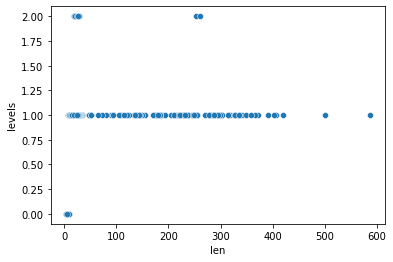

In [17]:
import seaborn as sns

sns.scatterplot(
    x="len", y="levels", data=column_analysis_pd
)

<AxesSubplot:xlabel='len', ylabel='Count'>

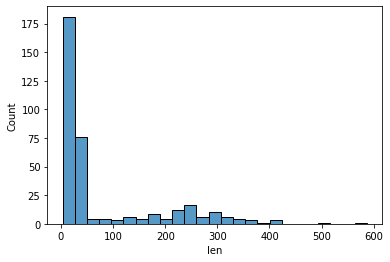

In [19]:
sns.histplot(
    column_analysis_pd["len"]
)

In [22]:
print(
    "Columns with less than 40 chars: ",
    list(
        column_analysis_pd[column_analysis_pd["len"] < 40]["colname"]
    )
)

Columns with less than 40 chars:  ['title', 'lemma', 'inflected', 'lang', 'lang_code', 'syllables', 'pos_Substantiv', 'ipa', 'rhymes', 'flexion_Genus', 'flexion_Nominativ Singular', 'flexion_Nominativ Plural', 'flexion_Genitiv Singular', 'flexion_Genitiv Plural', 'flexion_Dativ Singular', 'flexion_Dativ Plural', 'flexion_Akkusativ Singular', 'flexion_Akkusativ Plural', 'flexion_Nominativ Plural 1', 'flexion_Nominativ Plural 2', 'flexion_Genitiv Plural 1', 'flexion_Genitiv Plural 2', 'flexion_Dativ Plural 1', 'flexion_Dativ Plural 2', 'flexion_Akkusativ Plural 1', 'flexion_Akkusativ Plural 2', 'flexion_Genitiv Singular*', 'flexion_Genitiv Singular**', 'flexion_Dativ Singular*', 'pos_Pronomen', 'pos_Verb', 'flexion_Präsens_ich', 'flexion_Präsens_du', 'flexion_Präsens_er, sie, es', 'flexion_Präteritum_ich', 'flexion_Partizip II', 'flexion_Konjunktiv II_ich', 'flexion_Imperativ Singular', 'flexion_Imperativ Plural', 'flexion_Hilfsverb', 'pos_Deklinierte Form', 'pos_Adjektiv', 'flexion_Posi

In [ ]:
# Analizar los valores en local, vamos a buscar aquellas columnas en las que haya una frequencia
# baja de nulos (sacamos las distribucion de nulos por columna y con eso ya nos da una pista de como filtrar)